In [55]:
install.packages("randomForest",repos='http://cran.us.r-project.org')

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\puneeth\AppData\Local\Temp\RtmpApwefn\downloaded_packages


In [120]:
install.packages("dplyr",repos="http://cran.us.r-project.org")

package 'plyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'plyr'"


The downloaded binary packages are in
	C:\Users\puneeth\AppData\Local\Temp\RtmpApwefn\downloaded_packages


In [5]:
install.packages("ggplot2",repos='http://cran.us.r-project.org')

also installing the dependency 'plyr'



package 'plyr' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\puneeth\AppData\Local\Temp\RtmpWAPJiZ\downloaded_packages


In [4]:
library("dplyr")

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [6]:
library("ggplot2")

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [6]:
library("randomForest")

Warning message:
"package 'randomForest' was built under R version 3.3.3"randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine



In [24]:
imdb<-read.csv("movie_metadata.csv")

In [25]:
head(imdb)

color director_name     num_critic_for_reviews duration
1 Color James Cameron     723                    178     
2 Color Gore Verbinski    302                    169     
3 Color Sam Mendes        602                    148     
4 Color Christopher Nolan 813                    164     
5       Doug Walker        NA                     NA     
6 Color Andrew Stanton    462                    132     
  director_facebook_likes actor_3_facebook_likes actor_2_name    
1     0                     855                  Joel David Moore
2   563                    1000                  Orlando Bloom   
3     0                     161                  Rory Kinnear    
4 22000                   23000                  Christian Bale  
5   131                      NA                  Rob Walker      
6   475                     530                  Samantha Morton 
  actor_1_facebook_likes gross     genres                          ...
1  1000                  760505847 Action|Adventure|Fantasy|Sci-Fi ...
2 40000                  309404152 Action|Adventure|Fantasy        ...
3 11000                  200074175 Action|Adventure|Thriller       ...
4 27000                  448130642 Action|Thriller                 ...
5   131                         NA Documentary                     ...
6   640                   73058679 Action|Adventure|Sci-Fi         ...
  num_user_for_reviews language country content_rating budget    title_year
1 3054                 English  USA     PG-13          237000000 2009      
2 1238                 English  USA     PG-13          300000000 2007      
3  994                 English  UK      PG-13          245000000 2015      
4 2701                 English  USA     PG-13          250000000 2012      
5   NA                                                        NA   NA      
6  738                 English  USA     PG-13          263700000 2012      
  actor_2_facebook_likes imdb_score aspect_ratio movie_facebook_likes
1   936                  7.9        1.78          33000              
2  5000                  7.1        2.35              0              
3   393                  6.8        2.35          85000              
4 23000                  8.5        2.35         164000              
5    12                  7.1          NA              0              
6   632                  6.6        2.35          24000

In [23]:
length(unique(imdb$title_year))

[1] 92

In [10]:
names(imdb)

[1] "color"                     "director_name"            
 [3] "num_critic_for_reviews"    "duration"                 
 [5] "director_facebook_likes"   "actor_3_facebook_likes"   
 [7] "actor_2_name"              "actor_1_facebook_likes"   
 [9] "gross"                     "genres"                   
[11] "actor_1_name"              "movie_title"              
[13] "num_voted_users"           "cast_total_facebook_likes"
[15] "actor_3_name"              "facenumber_in_poster"     
[17] "plot_keywords"             "movie_imdb_link"          
[19] "num_user_for_reviews"      "language"                 
[21] "country"                   "content_rating"           
[23] "budget"                    "title_year"               
[25] "actor_2_facebook_likes"    "imdb_score"               
[27] "aspect_ratio"              "movie_facebook_likes"

In [26]:
imdb2<-imdb[c('director_facebook_likes','title_year','num_voted_users','duration','language','num_critic_for_reviews','num_user_for_reviews','actor_3_facebook_likes','actor_1_facebook_likes','gross','cast_total_facebook_likes','budget','actor_2_facebook_likes','imdb_score','movie_facebook_likes')]

In [42]:
length(names(imdb2))

[1] 15

In [27]:
imdb2<-na.omit(imdb2)

In [28]:
head(imdb2)

director_facebook_likes title_year num_voted_users duration language
1     0                   2009        886204         178      English 
2   563                   2007        471220         169      English 
3     0                   2015        275868         148      English 
4 22000                   2012       1144337         164      English 
6   475                   2012        212204         132      English 
7     0                   2007        383056         156      English 
  num_critic_for_reviews num_user_for_reviews actor_3_facebook_likes
1 723                    3054                   855                 
2 302                    1238                  1000                 
3 602                     994                   161                 
4 813                    2701                 23000                 
6 462                     738                   530                 
7 392                    1902                  4000                 
  actor_1_facebook_likes gross     cast_total_facebook_likes budget   
1  1000                  760505847   4834                    237000000
2 40000                  309404152  48350                    300000000
3 11000                  200074175  11700                    245000000
4 27000                  448130642 106759                    250000000
6   640                   73058679   1873                    263700000
7 24000                  336530303  46055                    258000000
  actor_2_facebook_likes imdb_score movie_facebook_likes
1   936                  7.9         33000              
2  5000                  7.1             0              
3   393                  6.8         85000              
4 23000                  8.5        164000              
6   632                  6.6         24000              
7 11000                  6.2             0

In [32]:
row_sub = apply(imdb2, 1, function(row) all(row !=0 ))
##Subset as usual
demo<-imdb2[row_sub,]

In [33]:
head(demo)

director_facebook_likes title_year num_voted_users duration language
1     0                   2009        886204         178      English 
2   563                   2007        471220         169      English 
3     0                   2015        275868         148      English 
4 22000                   2012       1144337         164      English 
6   475                   2012        212204         132      English 
7     0                   2007        383056         156      English 
  num_critic_for_reviews num_user_for_reviews actor_3_facebook_likes
1 723                    3054                   855                 
2 302                    1238                  1000                 
3 602                     994                   161                 
4 813                    2701                 23000                 
6 462                     738                   530                 
7 392                    1902                  4000                 
  actor_1_facebook_likes gross     cast_total_facebook_likes budget   
1  1000                  760505847   4834                    237000000
2 40000                  309404152  48350                    300000000
3 11000                  200074175  11700                    245000000
4 27000                  448130642 106759                    250000000
6   640                   73058679   1873                    263700000
7 24000                  336530303  46055                    258000000
  actor_2_facebook_likes imdb_score movie_facebook_likes
1   936                  7.9         33000              
2  5000                  7.1             0              
3   393                  6.8         85000              
4 23000                  8.5        164000              
6   632                  6.6         24000              
7 11000                  6.2             0

In [15]:
max(demo$num_voted_users)

[1] 1689764

In [37]:
demo$grosscat<-cut(demo$gross, c(0,3000000,35000000,800000000),labels=c("bad","Avg","Good"))

In [38]:
demo

director_facebook_likes title_year num_voted_users duration language
1        0                   2009        886204         178      English 
2      563                   2007        471220         169      English 
3        0                   2015        275868         148      English 
4    22000                   2012       1144337         164      English 
6      475                   2012        212204         132      English 
7        0                   2007        383056         156      English 
8       15                   2010        294810         100      English 
9        0                   2015        462669         141      English 
10     282                   2009        321795         153      English 
11       0                   2016        371639         183      English 
12       0                   2006        240396         169      English 
13     395                   2008        330784         106      English 
14     563                   2006        522040         151      English 
15     563                   2013        181792         150      English 
16       0                   2013        548573         143      English 
17      80                   2008        149922         150      English 
18       0                   2012        995415         173      English 
19     252                   2011        370704         136      English 
20     188                   2012        268154         106      English 
21       0                   2014        354228         164      English 
22     464                   2012        451803         153      English 
23       0                   2010        211765         156      English 
24       0                   2013        483540         186      English 
25     129                   2007        149019         113      English 
26       0                   2005        316018         201      English 
27       0                   1997        793059         194      English 
28      94                   2016        272670         147      English 
29     532                   2012        202382         131      English 
30     365                   2015        418214         124      English 
31       0                   2012        522030         143      English 
...  ...                     ...        ...             ...      ...     
4959   0                     1920            5          110              
4960 467                     1987         2770           81      English 
4963  56                     2001         4117           90      English 
4965   3                     2013        12796           88      English 
4972  29                     2009        67824          114      English 
4974   0                     1998       142619           84      English 
4976   0                     1998         1622           87      English 
4978 293                     2004        85028          100      English 
4979  32                     2011         1389           82      English 
4980 217                     2014         5507           82      English 
4985   0                     1995         6375           98      English 
4988 969                     2010        11816           98      English 
4998 234                     2000         6246           90      English 
4999   4                     1999         2631           90      English 
5005   6                     2007          143           78      English 
5009   0                     1994       181749          102      English 
5012 119                     1997        11550           97      English 
5013 453                     2014        47502          109      English 
5016   0                     1991        15103          100      English 
5022 157                     2005         4067           85      English 
5024  38                     2009         1194           88      English 
5026   0                     1972        16792          108      English 
5027 107 

In [39]:
table(demo$grosscat)


 bad  Avg Good 
 676 1512 1691 

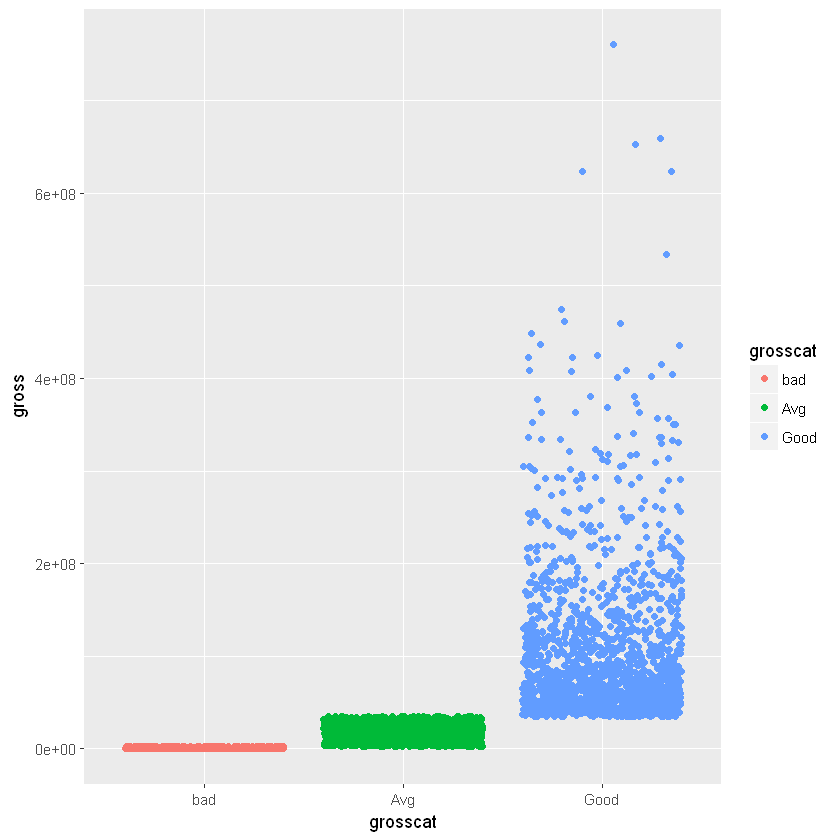

In [40]:
ggplot(data=demo,aes(x=grosscat,y=gross,color=grosscat))+geom_jitter()

In [29]:
set.seed(101)
# Now Selecting 75% of data as sample from total 'n' rows of the data  
sample <- sample.int(n = nrow(demo), size = floor(.75*nrow(demo)), replace = F)
train <- demo[sample, ]
test  <- demo[-sample, ]

In [34]:
dim(train)

[1] 2909   16

In [41]:
summary(imdb)

              color               director_name  num_critic_for_reviews
                 :  19                   : 104   Min.   :  1.0         
  Black and White: 209   Steven Spielberg:  26   1st Qu.: 50.0         
 Color           :4815   Woody Allen     :  22   Median :110.0         
                         Clint Eastwood  :  20   Mean   :140.2         
                         Martin Scorsese :  20   3rd Qu.:195.0         
                         Ridley Scott    :  17   Max.   :813.0         
                         (Other)         :4834   NA's   :50            
    duration     director_facebook_likes actor_3_facebook_likes
 Min.   :  7.0   Min.   :    0.0         Min.   :    0.0       
 1st Qu.: 93.0   1st Qu.:    7.0         1st Qu.:  133.0       
 Median :103.0   Median :   49.0         Median :  371.5       
 Mean   :107.2   Mean   :  686.5         Mean   :  645.0       
 3rd Qu.:118.0   3rd Qu.:  194.5         3rd Qu.:  636.0       
 Max.   :511.0   Max.   :23000.0        

In [35]:
dim(test)

[1] 970  16

In [36]:
model <- randomForest(grosscat ~ . , data = demo)

In [31]:
pred <- predict(model, newdata = test)

In [59]:
class(pred[1])

[1] "factor"

In [386]:
class(test$grosscat)

[1] "factor"

In [32]:
table(pred,test$grosscat)

      
pred   bad Avg Good
  bad  100  38    6
  Avg   37 288   97
  Good   6  67  330

In [33]:
(100+288+330)/nrow(test)

[1] 0.7402062

In [107]:
pred <- predict(model, newdata = train)
table(pred,train$grosscat)

    
pred   1   2   3   4   5   6   7   8   9  10  11
  1   66   0   0   0   0   0   0   0   0   0   0
  2    0  78   0   0   0   0   0   0   0   0   0
  3    0   0  38   0   0   0   0   0   0   0   0
  4    0   0   0 252   0   0   0   0   0   0   0
  5    0   0   0   0 491   0   0   0   0   0   0
  6    0   0   0   0   0 210   0   0   0   0   0
  7    0   0   0   0   0   0  92   0   0   0   0
  8    0   0   0   0   0   0   0  55   0   0   0
  9    0   0   0   0   0   0   0   0  37   0   0
  10   0   0   0   0   0   0   0   0   0  22   0
  11   0   0   0   0   0   0   0   0   0   0   2